# 3 - Modelo de predição

In [72]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [44]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

data_apartments = pd.read_csv("teste_indicium_precificacao.csv")  

## Trasformação de variáveis e novas features

Vamos descobrir novas features para nosso modelo e adequar algumas variáveis para melhorar a sua performance. Com base na análise exploratória feita pela instrução 1, vamos as variáveis propostas. Vamos fazer uma cópia do data frame onde pode conter nossas transformações e variáveis novas


In [45]:
data_apartments_transformada = data_apartments.copy()

### Distância aos ponstos de interesse

Os pontos de interesse seriam locais específicos onde a ditância a ele influência sobre o preço do imóvel, conclusão retirada da análise exploratória das cordenadas geográficas e sua influência no preço. Para isso utilizaremos de médodos não-supervionado de agrupamentos para identificar seus pontos.

Primeiramente vamos distribuir os preços ao redor da média.

In [46]:
import numpy as np

c = 0.1

#Distribuição dos valores pela gaussiana
data_apartments_transformada['price_log'] = np.log(data_apartments['price']+c)

dados_por_regiao_normalizados = pd.DataFrame()

for regiao in data_apartments['bairro_group'].unique():
    dados_regiao = data_apartments[data_apartments['bairro_group'] == regiao].copy()
    
    # Trasformar preços por região 'bairro_group'
    dados_regiao['price_log'] =  np.log(dados_regiao['price']+c)
    
    dados_por_regiao_normalizados = pd.concat([dados_por_regiao_normalizados, dados_regiao])


Dessa forma temos todos os preços das regiões igualmente distribuídos em comparação aos preços do histograma da análise exploratória, em que os preços estavam distantes da média.

O segundo ponto seria usar método não supervisionado Kmeas para descobirir os pontos, muito bem coletamos apenas as cordenadas. Em seguida ajustamos sua escla e usamos o loop para descobrir os valores WCSS e utilizar a regra do cotove-lo para determinar o número de clusters no agrupamento

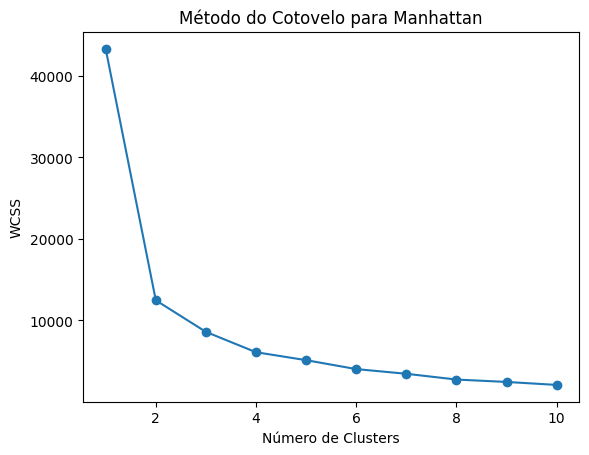

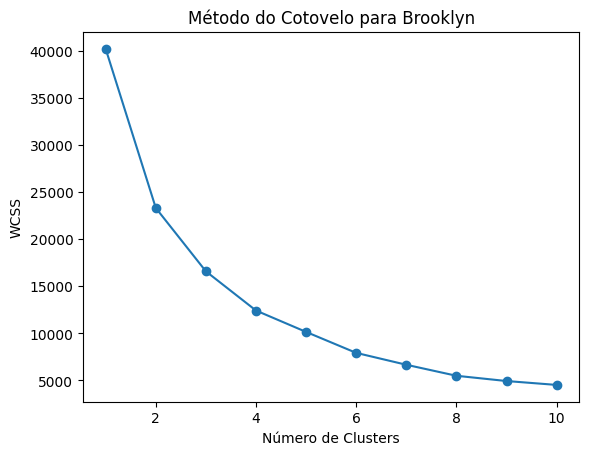

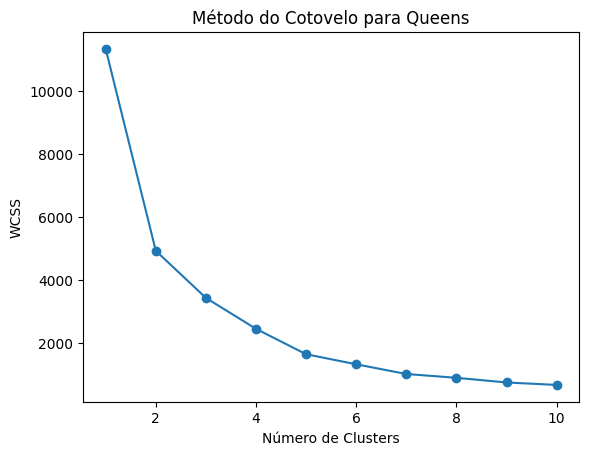

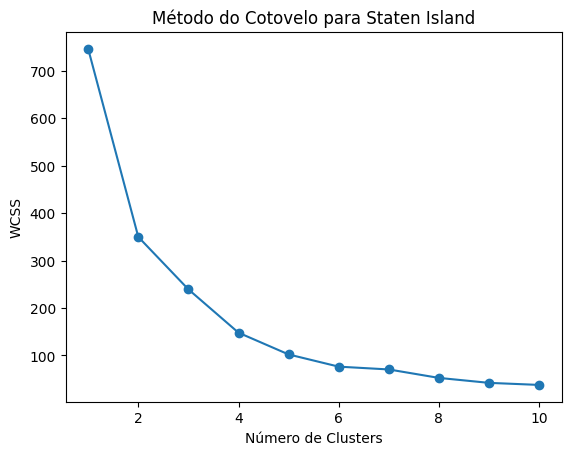

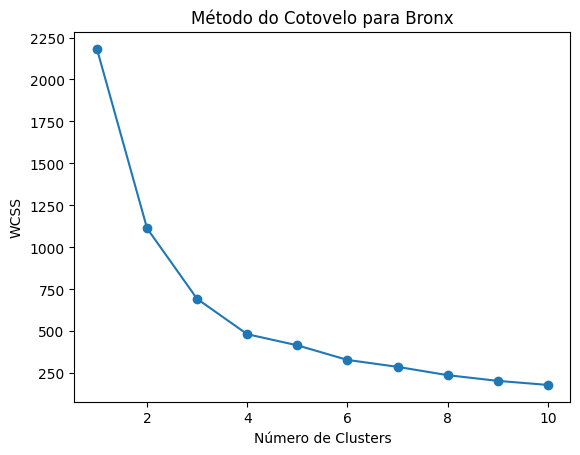

In [47]:

# Utilizar agrupamento
for regiao in dados_por_regiao_normalizados['bairro_group'].unique():
    geo_data_interesse = dados_por_regiao_normalizados[dados_por_regiao_normalizados['bairro_group']==regiao][['latitude', 'longitude']]
    scaler = StandardScaler()
    geo_data_interesse_scaled = scaler.fit_transform(geo_data_interesse)

    geo_data_interesse_scaled_df = pd.DataFrame(geo_data_interesse_scaled, columns=['latitude_scaled', 'longitude_scaled'])
    dados_por_regiao_normalizados.loc[dados_por_regiao_normalizados['bairro_group'] == regiao, ['latitude_scaled', 'longitude_scaled']] = geo_data_interesse_scaled_df.values

    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(geo_data_interesse_scaled)
        wcss.append(kmeans.inertia_)


    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(f"Método do Cotovelo para {regiao}")
    plt.xlabel("Número de Clusters")
    plt.ylabel("WCSS")
    plt.show()



Pela regra do cotovelo notamos que o número adequado seria K=2, mas qunato mais pontos de opções tivermos melhor porderá ser o resultado. Um teste com os dois é cabível aqui.

/tmp/ipykernel_14826/1264821067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_regiao['regiao_cluster'] = kmeans.fit_predict(dados_regiao[['latitude_scaled', 'longitude_scaled']])


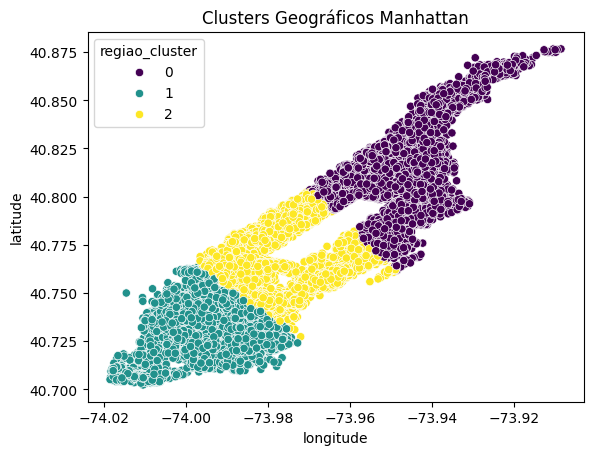

   regiao_cluster    price     price_log
0               0   847357  31083.424677
1               1  1962508  44283.772101
2               2  1454662  32936.819714
   regiao_cluster       price  price_log
0               0  125.497186   4.603588
1               1  229.291740   5.173942
2               2  229.080630   5.186901
Centróides para a região Manhattan:
Cluster 0: [ 40.81143035 -73.94701323]
Cluster 1: [ 40.72890526 -73.99438235]
Cluster 2: [ 40.76484521 -73.97709069]


/tmp/ipykernel_14826/1264821067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_regiao['regiao_cluster'] = kmeans.fit_predict(dados_regiao[['latitude_scaled', 'longitude_scaled']])


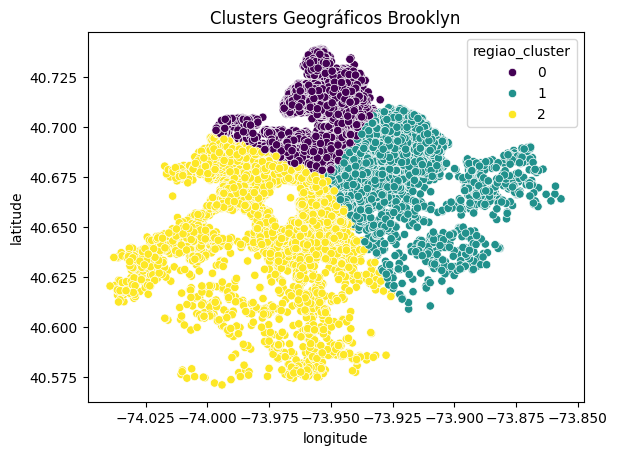

   regiao_cluster    price     price_log
0               0  1111231  37188.529243
1               1   620752  27247.364589
2               2   768468  27327.277631
   regiao_cluster       price  price_log
0               0  140.413318   4.699081
1               1   99.352113   4.360974
2               2  129.349941   4.599777
Centróides para a região Brooklyn:
Cluster 0: [ 40.70640506 -73.95452118]
Cluster 1: [ 40.68455721 -73.92385033]
Cluster 2: [ 40.65724457 -73.97533807]


/tmp/ipykernel_14826/1264821067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_regiao['regiao_cluster'] = kmeans.fit_predict(dados_regiao[['latitude_scaled', 'longitude_scaled']])


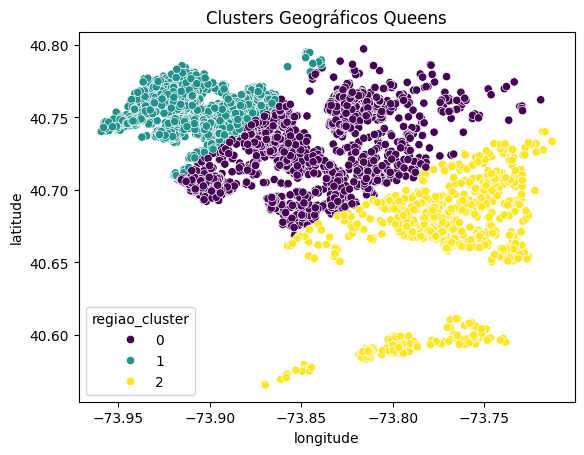

   regiao_cluster   price     price_log
0               0  182656   8536.738371
1               1  293846  12581.169285
2               2   87365   3657.678292
   regiao_cluster       price  price_log
0               0   91.648771   4.283361
1               1  103.176264   4.417545
2               2  105.896970   4.433549
Centróides para a região Queens:
Cluster 0: [ 40.72483308 -73.85301726]
Cluster 1: [ 40.75674015 -73.91487339]
Cluster 2: [ 40.66084303 -73.77541793]


/tmp/ipykernel_14826/1264821067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_regiao['regiao_cluster'] = kmeans.fit_predict(dados_regiao[['latitude_scaled', 'longitude_scaled']])


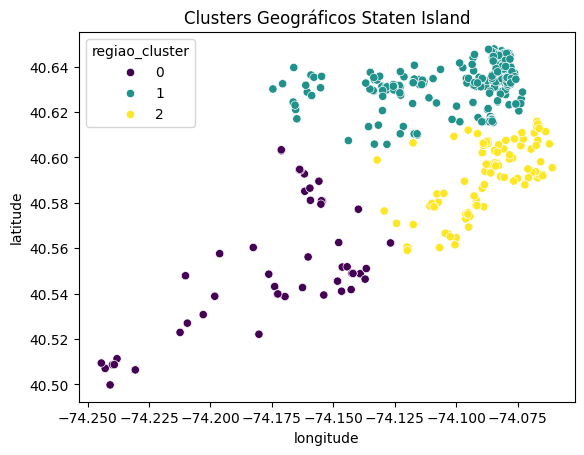

   regiao_cluster  price   price_log
0               0   6799  226.720258
1               1  25332  945.675238
2               2  10694  458.927898
   regiao_cluster       price  price_log
0               0  135.980000   4.534405
1               1  117.277778   4.378126
2               2   99.943925   4.289046
Centróides para a região Staten Island:
Cluster 0: [ 40.5520046 -74.1737556]
Cluster 1: [ 40.63257352 -74.09918722]
Cluster 2: [ 40.59231514 -74.08741327]


/tmp/ipykernel_14826/1264821067.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_regiao['regiao_cluster'] = kmeans.fit_predict(dados_regiao[['latitude_scaled', 'longitude_scaled']])


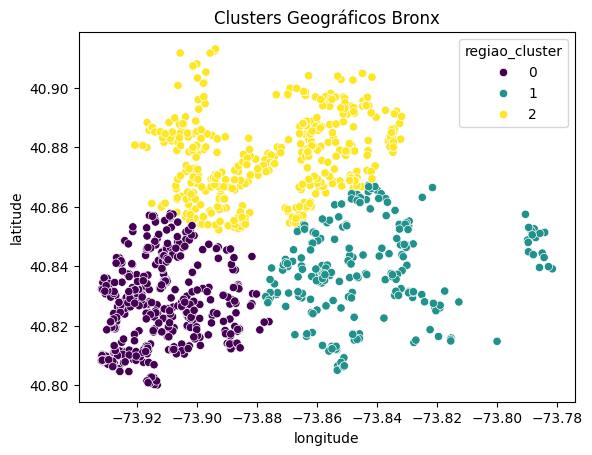

   regiao_cluster  price    price_log
0               0  35117  1851.252310
1               1  21745   977.205962
2               2  38597  1797.048365
   regiao_cluster      price  price_log
0               0  79.811364   4.207392
1               1  95.372807   4.285991
2               2  91.245863   4.248341
Centróides para a região Bronx:
Cluster 0: [ 40.82644902 -73.91295629]
Cluster 1: [ 40.83860579 -73.84374838]
Cluster 2: [ 40.87614969 -73.87708377]


In [48]:
k = 3
centroides_por_regiao_cluster = {}


for regiao in dados_por_regiao_normalizados['bairro_group'].unique():
    dados_regiao = dados_por_regiao_normalizados[dados_por_regiao_normalizados['bairro_group']==regiao]

    # Cria kmeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    dados_regiao['regiao_cluster'] = kmeans.fit_predict(dados_regiao[['latitude_scaled', 'longitude_scaled']])
    dados_por_regiao_normalizados.loc[dados_por_regiao_normalizados['bairro_group'] == regiao, 'regiao_cluster'] = dados_regiao['regiao_cluster']
    
    centroides_normalizados = kmeans.cluster_centers_
    
    # Transforma os centróides de volta para as coordenadas originais
    scaler = StandardScaler()
    scaler.fit(dados_regiao[['latitude', 'longitude']])  # Ajusta o scaler aos dados originais
    centroides_originais = scaler.inverse_transform(centroides_normalizados)
    
    # Armazena os centróides no dicionário, associando região e cluster
    centroides_por_regiao_cluster[regiao] = {}
    for cluster_id, centroide in enumerate(centroides_originais):
        centroides_por_regiao_cluster[regiao][cluster_id] = centroide

    sns.scatterplot(data=dados_regiao, x='longitude', y='latitude', hue='regiao_cluster', palette="viridis")
    plt.title(f"Clusters Geográficos {regiao}")
    plt.show()

    print(dados_regiao.groupby('regiao_cluster')[['price', 'price_log']].sum().reset_index())
    print(dados_regiao.groupby('regiao_cluster')[['price', 'price_log']].mean().reset_index())
    print(f"Centróides para a região {regiao}:")
    for cluster_id, centroide in centroides_por_regiao_cluster[regiao].items():
        print(f"Cluster {cluster_id}: {centroide}")


Dessas áreas podemos recuperar o centroíde de cada uma, onde tem sua maior densidade. Por meio do centróide teremos pontos que representam uma área de interesse naquela região então ecoheremos os seguintes:
Centroides 0 e 1 de Manhattan e Brooklyn, centroide do Queens e Staten Island, centroide 0 do Broonx


In [49]:

pontos_de_interesse = [
    centroides_por_regiao_cluster['Manhattan'][2], centroides_por_regiao_cluster['Manhattan'][1],
    centroides_por_regiao_cluster['Brooklyn'][0], centroides_por_regiao_cluster['Brooklyn'][2], 
    centroides_por_regiao_cluster['Staten Island'][1],
    centroides_por_regiao_cluster['Queens'][1], centroides_por_regiao_cluster['Queens'][2]
    ]

# pontos_de_interesse = scaler.inverse_transform(kmeans.cluster_centers_)
print(pontos_de_interesse)

[array([ 40.76484521, -73.97709069]), array([ 40.72890526, -73.99438235]), array([ 40.70640506, -73.95452118]), array([ 40.65724457, -73.97533807]), array([ 40.63257352, -74.09918722]), array([ 40.75674015, -73.91487339]), array([ 40.66084303, -73.77541793])]


Os pontos de áreas mais relevantes foram descobertos, agora calulamos a distâcia deste ponto até a área onde se encontra o imóvel locado. E atribuímos essa distância aos dados e encontramos uma correlação.

In [50]:
from geopy.distance import geodesic

def calcular_distancia_mais_proxima(row, pontos_interesse):
    distancias = [
        geodesic((row['latitude'], row['longitude']), (pi[0], pi[1])).km
        for pi in pontos_interesse
    ]
    return min(distancias)

# Aplicar a função ao dataset
data_apartments_transformada['interesse_mais_proximo'] = data_apartments_transformada.apply(calcular_distancia_mais_proxima, 
                                        pontos_interesse=pontos_de_interesse, axis=1)


correlacao = data_apartments_transformada['price_log'].corr(data_apartments_transformada['interesse_mais_proximo'])
print(f"Correlação de:{correlacao}")


Correlação de:-0.26832167399609314


Algumas áreas podem ser de interesse e outras não...

In [51]:
areas_evitadas = [
    centroides_por_regiao_cluster['Manhattan'][0], centroides_por_regiao_cluster['Bronx'][0],
    centroides_por_regiao_cluster['Brooklyn'][1], centroides_por_regiao_cluster['Bronx'][2], 
    centroides_por_regiao_cluster['Staten Island'][0],centroides_por_regiao_cluster['Staten Island'][1],centroides_por_regiao_cluster['Staten Island'][2],
    centroides_por_regiao_cluster['Queens'][0], centroides_por_regiao_cluster['Queens'][2],centroides_por_regiao_cluster['Bronx'][1],
    ]

# Aplicar a função ao dataset
data_apartments_transformada['areas_evitadas'] = data_apartments_transformada.apply(calcular_distancia_mais_proxima, 
                                        pontos_interesse=areas_evitadas, axis=1)


correlacao = data_apartments_transformada['price_log'].corr(data_apartments_transformada['areas_evitadas'])
print(f"Correlação de:{correlacao}")


Correlação de:0.3419152097831795


Essa é uma correlação favorável para o nosso modelo.

## Regiões 

A feature `bairro_group` tem uma relevância para os preços o que segue a ordem de Manhattan, Brooklyn, Queens, Bronx e Staten Island, precisamos fazer com que o modelo dê mais valor a Manhattan, menos valor a Brooklyn , Queens e Bronx (respectivamente) e Staten Island um tanto indiferente. Vamos aplicar a codificação One-Hot Encoding (transformando a variável em várias colunas), em seguida aplicar uma ponderação nas categorias.

In [52]:
bairro_group_dummies = pd.get_dummies(data_apartments_transformada['bairro_group'], prefix='bairro_group_weigth')


media_price_by_bairro = data_apartments_transformada.groupby('bairro_group')['price_log'].mean().reset_index()
media_price_by_bairro = media_price_by_bairro.set_index('bairro_group')


bairro_group_weights = media_price_by_bairro['price_log'].to_dict()

bairro_group_dummies_weighted = bairro_group_dummies.mul(data_apartments['bairro_group'].map(bairro_group_weights), axis=0)

data_apartments_transformada = pd.concat([data_apartments_transformada, bairro_group_dummies_weighted], axis=1)

bairro_group_dummies_weighted.head()

,bairro_group_weigth_Bronx,bairro_group_weigth_Brooklyn,bairro_group_weigth_Manhattan,bairro_group_weigth_Queens,bairro_group_weigth_Staten Island
0,0.0,0.000000,4.999955,0.0,0.0
1,0.0,0.000000,4.999955,0.0,0.0
2,0.0,4.564651,0.000000,0.0,0.0
3,0.0,0.000000,4.999955,0.0,0.0
4,0.0,0.000000,4.999955,0.0,0.0


## Bairros mapeados

Vamos executar a média de cada bairro, a partitr do preço original.

In [53]:
preco_medio_bairro = data_apartments_transformada.groupby('bairro')['price_log'].mean()

data_apartments_transformada['preco_medio_bairro'] = data_apartments_transformada['bairro'].map(preco_medio_bairro)

correlacao = data_apartments_transformada['price_log'].corr(data_apartments_transformada['preco_medio_bairro'])
print(f"Correlação de:{correlacao}")

Correlação de:0.5220905622523428


Agora o preço médio de cada bairro consiguira exercer uma influência nas regiões.

### Tipos de quarto

O tipo de quarto tem uma influência forte no preço, pois ele determina o espaço e comodidade do hóspede ou morador. Portanto seguiremos o padrão 'Entrie room/apt' > 'Private room' > 'Shared room'. Vamos usar essa abordagem por adicionar um pouco de conhecimento de heurística, considerando essa ordam e utilizar uma pontuação para cada tipo, depois calcularemos a correlação

In [54]:
room_type_pesos = {'Entire home/apt': 0.9, 'Private room': 0.41, 'Shared room': 0.21}

data_apartments_transformada['peso_room_type'] = data_apartments['room_type'].map(room_type_pesos)
print(data_apartments_transformada[['price_log','price', 'peso_room_type']].corr())

                price_log     price  peso_room_type
price_log        1.000000  0.632602        0.615703
price            0.632602  1.000000        0.255496
peso_room_type   0.615703  0.255496        1.000000


### Palavras chave no nome

Pela nuvem de palavras que realizei a partir dos nome, recolhi as palavras mais repetidas dos 50 imóveis mais caros, dos 10% mais caros e de todos, os nomes em geral. Assim vamos contruir um dicionário e calcualar a pontuação, lembrando que a pontuação para palavras que se repetem acumula

In [55]:
import re

keywords_priority = {
    3: ['Duplex', 'Loft', 'BR', 'Apt', 'Spacious','Luxury'],  # Top 50 mais caros
    2: ['Duplex','Apartment', 'Loft', 'Luxury', 'Apt', 'Bedroom', 'Spacious', 'NYC', 'Beautiful', 'Central Park'],  # Top 10% mais caros
    1: ['Private Room', 'Heart', 'Beautiful', 'Apartment', 'Williamsburg']  # Gerais
}
word_weights = {}

for category_weight, words in keywords_priority.items():
    for index, word in enumerate(words):
        if(word.lower() not in word_weights.keys()):
            word_weights[word.lower()] = 0
        word_weights[word.lower()] = category_weight - (index * 0.1) + word_weights[word.lower()] 


print(word_weights)

def calcular_score_nome(nome):
    nome = str(nome).lower() 
    palavras = re.findall(r'\b\w+\b', nome)  
    
    pesos_encontrados = [word_weights[p] for p in palavras if p in word_weights]
    
    return sum(pesos_encontrados)  

data_apartments_transformada['score_nome'] = data_apartments['nome'].apply(calcular_score_nome)

print(data_apartments_transformada[['price_log', 'score_nome']].corr())

data_apartments_transformada[['nome', 'score_nome']].head(20)


{'duplex': 5.0, 'loft': 4.7, 'br': 2.8, 'apt': 4.300000000000001, 'spacious': 4.0, 'luxury': 4.2, 'apartment': 2.5999999999999996, 'bedroom': 1.5, 'nyc': 1.2999999999999998, 'beautiful': 2.0, 'central park': 1.1, 'private room': 1.0, 'heart': 0.9, 'williamsburg': 0.6}
            price_log  score_nome
price_log    1.000000    0.177014
score_nome   0.177014    1.000000


,nome,score_nome
0,Skylit Midtown Castle,0.0
1,THE VILLAGE OF HARLEM....NEW YORK !,0.0
2,Cozy Entire Floor of Brownstone,0.0
3,Entire Apt: Spacious Studio/Loft by central park,13.0
4,Large Cozy 1 BR Apartment In Midtown East,5.4
5,BlissArtsSpace!,0.0
6,Large Furnished Room Near B'way,0.0
7,Cozy Clean Guest Room - Family Apt,4.3
8,Cute & Cozy Lower East Side 1 bdrm,0.0
9,Beautiful 1br on Upper West Side,2.0


## Construção do modelo

### Avaliação

1.**MAE(Mean Absolute Error - Erro Médio Absoluto)**

$$
\mathrm{MAE}=\frac{1}{n} \sum_{i=1}^n\left|y_i-\hat{y}_i\right|
$$

O MAE mede a média das diferenças absoluas entre os valores reais $(y_i)$ e os valores previstos $(\hat{y}_i)$. Mostra o quanto as métricas estão errando na unidade da previsão do modelo. É fácil de interpretar, não penalisa erros grandes, queremos um MAE menor possível

2.**RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio)**

$$
\mathrm{RMSE}=\sqrt{\frac{1}{n} \sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2}
$$

O RMSE mede a raiz quadrada da média dos erros ao quadrado. Ele indica o desvio padrão dos resíduos (erros) do modelo. Penaliza erros grandes, entretanto podem ter um impacto desproporcional. Queremos um RMSE pequeno.

3.**R² (Coeficiente de Determinação)**

$$
R^2=1-\frac{\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2}{\sum_{i=1}^n\left(y_i-\bar{y}\right)^2}
$$

O R² mede a proporção da variância na variável target que é explicada pelo modelo. Ele varia de 0 a 1 (ou de 0% a 100%). Um R² de 1 indica que o modelo explica 100% da variância dos dados (previsões perfeitas). Um R² de 0 indica que o modelo não explica nada da variância.
Fácil de interpretar e comparar entre modelos.

In [56]:
print(data_apartments_transformada.isnull().sum())
data_apartments_transformada[data_apartments_transformada['price'] == 0]


id                                       0
nome                                    16
host_id                                  0
host_name                               21
bairro_group                             0
bairro                                   0
latitude                                 0
longitude                                0
room_type                                0
price                                    0
minimo_noites                            0
numero_de_reviews                        0
ultima_review                        10052
reviews_por_mes                      10052
calculado_host_listings_count            0
disponibilidade_365                      0
price_log                                0
interesse_mais_proximo                   0
areas_evitadas                           0
bairro_group_weigth_Bronx                0
bairro_group_weigth_Brooklyn             0
bairro_group_weigth_Manhattan            0
bairro_group_weigth_Queens               0
bairro_grou

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,...,interesse_mais_proximo,areas_evitadas,bairro_group_weigth_Bronx,bairro_group_weigth_Brooklyn,bairro_group_weigth_Manhattan,bairro_group_weigth_Queens,bairro_group_weigth_Staten Island,preco_medio_bairro,peso_room_type,score_nome
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,...,1.796325,2.648279,0.000000,4.564651,0.000000,0.0,0.0,4.433363,0.41,0.0
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,...,8.792291,2.331396,4.239694,0.000000,0.000000,0.0,0.0,3.784677,0.41,0.0
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,...,2.865116,1.123736,0.000000,4.564651,0.000000,0.0,0.0,4.258392,0.41,4.7
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,...,2.334817,4.671745,0.000000,4.564651,0.000000,0.0,0.0,4.743200,0.41,0.0
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,...,0.716457,3.262990,0.000000,4.564651,0.000000,0.0,0.0,4.755374,0.90,4.1
25793,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,...,4.424576,0.935973,0.000000,4.564651,0.000000,0.0,0.0,4.433363,0.41,5.5
25794,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,...,4.469527,1.045721,0.000000,4.564651,0.000000,0.0,0.0,4.433363,0.41,1.5
25795,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,...,4.405832,0.956319,0.000000,4.564651,0.000000,0.0,0.0,4.433363,0.41,5.5
26258,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,...,1.550385,7.151462,0.000000,0.000000,4.999955,0.0,0.0,5.238854,0.90,0.0
26840,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,...,4.342246,1.674857,0.000000,4.564651,0.000000,0.0,0.0,4.258392,0.21,0.0


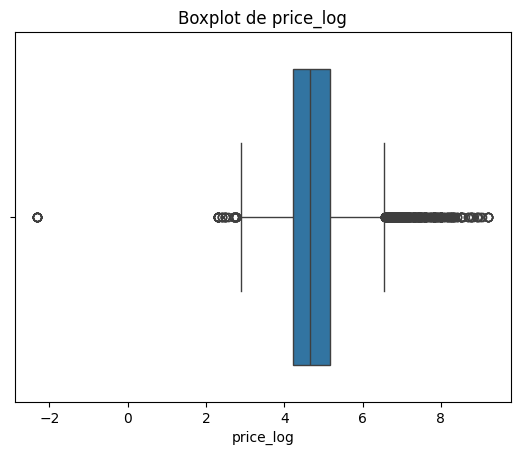

Outliers após transformação: 84       6.684737
495      7.600952
661      6.745354
690      6.633450
761      7.170196
           ...   
48485    2.778819
48522    7.221909
48534    7.466857
48696    6.620207
48838    6.684737
Name: price_log, Length: 637, dtype: float64
2.8408509679963516 6.560061002069078


In [57]:
precos_log = data_apartments_transformada['price_log'].astype(float)
sns.boxplot(x=precos_log)
plt.title("Boxplot de price_log")
plt.show()

Q1 = np.percentile(precos_log, 25) # Cálculo do IQR e limites
Q3 = np.percentile(precos_log, 75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = precos_log[(precos_log < limite_inferior) | (precos_log > limite_superior)]
print("Outliers após transformação:", outliers)
print(limite_inferior,limite_superior)

### Treinamento

Agora que todas as variáveis foram contruídas, vamos treinar e trestar o modelo de predição.

In [82]:
preco_minimo = data_apartments_transformada[data_apartments_transformada['price'] > 0]['price_log'].min()
preco_maximo = 6.6

print(preco_minimo)
data_apartments_transformada['price_log'] = data_apartments_transformada['price_log'].replace(0, preco_minimo)


2.312535423847214


MAE: 46.21
RMSE: 79.14
R² escala original: 0.3846
R² escala transformada: 0.5669121111668649


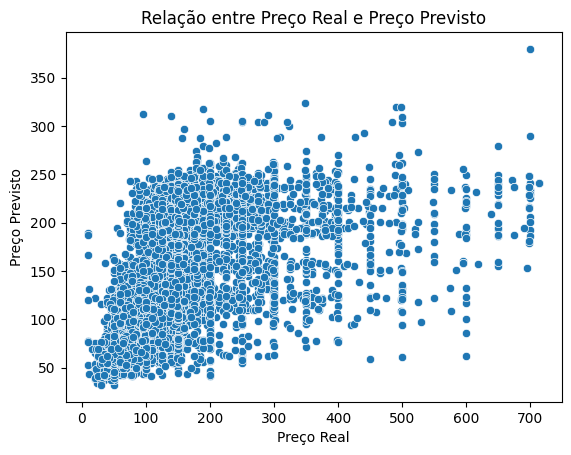

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

data_apartments_to_model = data_apartments_transformada[data_apartments_transformada['id'] != 2595]
data_apartments_to_model = data_apartments_to_model[data_apartments_to_model['price_log'] < preco_maximo]

features = ['interesse_mais_proximo', 'preco_medio_bairro', 'peso_room_type', 'score_nome', 'areas_evitadas'] 
features += [col for col in data_apartments_to_model.columns if col.startswith("bairro_group_weigth_")]  # Adicionar pesos das regiões

X = data_apartments_to_model[features]

Y = data_apartments_to_model['price_log']

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


X_treino, X_test, Y_treino, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

modelo_linear = LinearRegression()
modelo_linear.fit(X_treino, Y_treino)

y_pred_log = modelo_linear.predict(X_test)

y_pred_price = np.exp(y_pred_log) - c
y_test_price = np.exp(Y_test) - c  
# Avaliação do modelo

mae = mean_absolute_error(y_test_price, y_pred_price)
mse = mean_squared_error(y_test_price, y_pred_price)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_price, y_pred_price)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² escala original: {r2:.4f}")

print(f"R² escala transformada: {modelo_linear.score(X_test, Y_test)}")

sns.scatterplot(x=y_test_price, y=y_pred_price)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Relação entre Preço Real e Preço Previsto")
plt.show()


MAE: 46.86
RMSE: 78.32
R² escala original: 0.3973
R² escala transformada: 0.5397536496718243


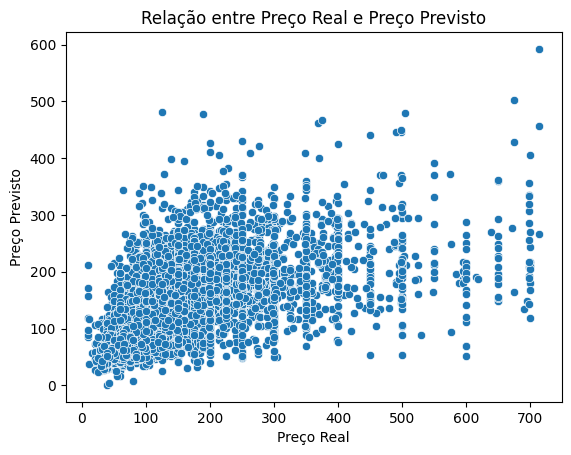

Importância das features: [1.83107133e-01 1.56339772e-01 4.13678563e-01 5.82697612e-02
 1.82894054e-01 3.87067542e-04 2.18947919e-03 1.04877619e-03
 1.40412303e-03 6.81270468e-04]


In [85]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=120, random_state=42)

forest.fit(X_treino, Y_treino)

y_pred_log = forest.predict(X_test)

y_pred_price = np.exp(y_pred_log) - c
y_test_price = np.exp(Y_test) - c  

mae = mean_absolute_error(y_test_price, y_pred_price)
mse = mean_squared_error(y_test_price, y_pred_price)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_price, y_pred_price)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² escala original: {r2:.4f}")

print(f"R² escala transformada: {forest.score(X_test, Y_test)}")

sns.scatterplot(x=y_test_price, y=y_pred_price)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Relação entre Preço Real e Preço Previsto")
plt.show()

importances = forest.feature_importances_
print("Importância das features:", importances)

Epoch 1/50


/home/garth/Projects/light-house-project-DC/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


967/967 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3607 - val_loss: 0.2028
Epoch 2/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2052 - val_loss: 0.1994
Epoch 3/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2031 - val_loss: 0.2053
Epoch 4/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2111 - val_loss: 0.2127
Epoch 5/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2031 - val_loss: 0.1954
Epoch 6/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1962 - val_loss: 0.2222
Epoch 7/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2044 - val_loss: 0.1978
Epoch 8/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1985 - val_loss: 0.1979
Epoch 9/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2053 - val_loss: 0.2053
Epoch 10/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1963 - val_loss: 0.1958
Epoch 11/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2012 - val_loss: 0.2015
Epoch 12/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

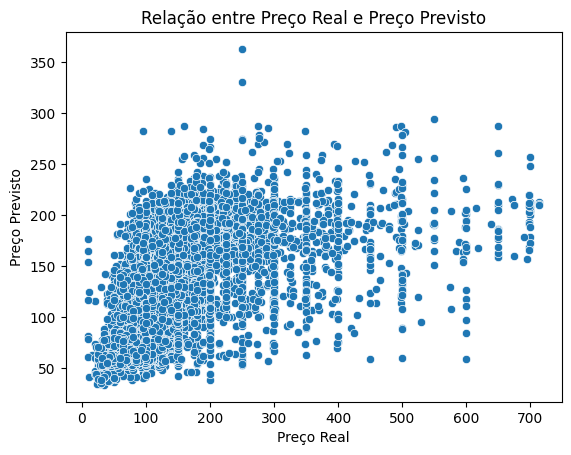

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo_RN = Sequential()
modelo_RN.add(Dense(64, input_dim=X_treino.shape[1], activation='relu'))
modelo_RN.add(Dense(32, activation='relu'))
modelo_RN.add(Dense(1, activation='linear'))

modelo_RN.compile(optimizer='adam', loss='mean_squared_error')
modelo_RN.fit(X_treino, Y_treino, epochs=50, batch_size=32, validation_split=0.2)

y_pred_log = modelo_RN.predict(X_test).flatten()
y_pred_price = np.exp(y_pred_log) - c
y_test_price = np.exp(Y_test) - c

mae = mean_absolute_error(y_test_price, y_pred_price)
rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2 = r2_score(y_test_price, y_pred_price)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² na escala original: {r2:.4f}")
print(f"R² na escala transformada: {r2_score(Y_test, y_pred_log):.4f}")

sns.scatterplot(x=y_test_price, y=y_pred_price)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Relação entre Preço Real e Preço Previsto")
plt.show()


## Perguntas

### Quais variáveis e/ou suas transformações você utilizou e por quê?

Foram utilizadas 'interesse_mais_proximo', 'preco_medio_bairro', 'peso_room_type', 'score_nome'

Os dados indicavam as variações principalmente a partir da regição e da descrição do imóvel. Apliquei transformações logaritmicas no preço 'price' para adquirir os interesses mais próximos e os preços médios por bairro.

### Qual tipo de problema estamos resolvendo (regressão, classificação)?

Regressão, por ser uma resposta quantitativa.

### Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

Todos os modelos que testei tem uma aproximação similar a dos dados, contando que os preços sejam baixos. O modelo que mais se aproxima seria o Random Forest, pois foi único que conseguiu alcançar preços mais altos. O radom forest que combina várias árvores de decisão para criar um modelo .mais robusto e preciso.

*Prós*: 
    - Alta precisão
    - Lida bem com relações não lineares
    - Robustez a outliers e ruídos
    - Não requer normalização dos dados

*Contras*:
    - Lento
    - Difícil interpretação
    - Parâmetros sensíveis

### Qual medida de performance do modelo foi escolhida e por quê?

Escolhi usar a correlação para analisar o quanto as variáveis tinham relações umas com as outras, também foi utilizado de nuvens de palavaras para identificar palavras chaves e de métodos não supervizionados, para de mapas de geolocalização de pontos estratégicos.


# 4 - Teste
Vamos executar o teste com o dado de id 2595. Que foi referente ao dao exigido pela instrução

In [88]:
data_unitario =  data_apartments_transformada[data_apartments_transformada['id'] == 2595]
data_id_teste_X = data_unitario[features]

data_id_y_pred_log = forest.predict(data_id_teste_X)

data_id_y_pred_price = np.exp(data_id_y_pred_log) - c


data_id_y_pred_price

array([257.48845056])

*Obs:*

É interessante que o dado escolhido não tenha sido utilizado no conjunto de treino.

# 5 - Salvando o modelo

Vamos salvar o modelo para que seja usado perpétuamente.


In [89]:
import pickle

with open("forest.pkl","wb") as file:
    pickle.dump(forest, file)

## Sua vez !

Obrigado por acompanhar nossa criação! Os modelos com quiser abaixo:

In [64]:
import pickle

modelo = {}
with open("./forest.pkl","rb") as file:
    modelo = pickle.load(file)